In [57]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame()

In [53]:
page = requests.get('https://weather.com/weather/tenday/l/San+Francisco+CA?canonicalCityId=dfdaba8cbe3a4d12a8796e1f7b1ccc7174b4b0a2d5ddb1c8566ae9f154fa638c')

source = BeautifulSoup(page.content, 'html.parser')

details = source.find( class_ = "DailyForecast--DisclosureList--350ZO" )

final = details.find_all('details')

h2_element = final[1].find('h2').text.split(' ')[1]

def convert_far(x):
    return round(5/9 * (int(x)-32))
def get_month_name(x):
    date = int(x)
    if (date < 10):
        return str(date) + ' April'
    else:
        return str(date) + ' March'

In [64]:
df = pd.DataFrame()
final.pop(0)
temps = []
print('Weather forcasting in SanFrancisco')
for each in final:
    full_date = each.find('h2').text
    date = full_date.split(' ')[1]
    day = full_date.split(' ')[0]
    date = get_month_name(date)
    description = each.find( class_ = "DailyContent--narrative--3AcXd" ).text
    temperature = each.find( class_ = "DetailsSummary--highTempValue--3x6cL")
    temperature = convert_far(temperature.text[:-1])
    temps.append(temperature)
    df = df.append(pd.DataFrame(
        {
            'Day': day,
            'Date': date,
            'Description': description, 
            'Temperature': temperature
        }, index = [1]), ignore_index = True)
df

Weather forcasting in SanFrancisco


,Day,Date,Description,Temperature
0,Sat,27 March,Sunny skies. High near 65F. ENE winds shifting...,18
1,Sun,28 March,Mostly sunny. High 61F. Winds W at 10 to 20 mph.,16
2,Mon,29 March,Mainly sunny. High 59F. Winds WNW at 15 to 25 ...,15
3,Tue,30 March,Sunny skies. High 66F. Winds NNW at 10 to 20 mph.,19
4,Wed,31 March,Sunny. High 69F. Winds N at 5 to 10 mph.,21
5,Thu,1 April,A mainly sunny sky. High 67F. Winds NNW at 10 ...,19
6,Fri,2 April,Intervals of clouds and sunshine. High 63F. Wi...,17
7,Sat,3 April,Partly cloudy. High 63F. Winds WNW at 15 to 25...,17
8,Sun,4 April,Abundant sunshine. High 61F. Winds WNW at 15 t...,16
9,Mon,5 April,Mostly sunny skies. High 59F. Winds WNW at 15 ...,15


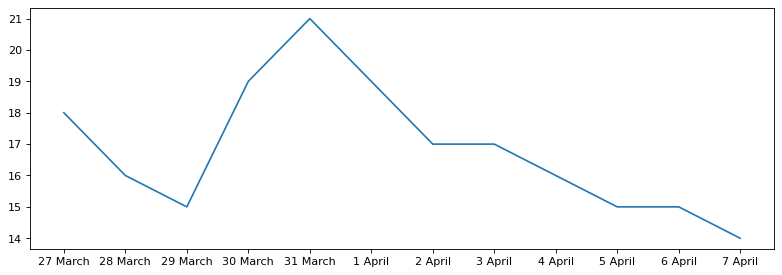

In [81]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df.Date, df.Temperature)